# Yugioh Card Analysis

In [99]:
import os
import math
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import re

In [4]:
# file reading

file_name = []
for files in os.listdir(r"C:\Users\daiya\OneDrive\Desktop\Yugioh"):
    file_name.append(files)


os.chdir(r'C:\Users\daiya\OneDrive\Desktop\Yugioh')

yugioh_list = pd.DataFrame()

for i in file_name:
    dd=pd.read_csv(i,encoding='ISO-8859-1')
    yugioh_list= yugioh_list.append(dd)

In [9]:
yugioh_list.head(20)

,Name,Set,Rarity,Id,Market Price
0,Red-Eyes B. Dragon,2002 Collectors Tin,Secret,BPT-005,$143.41
1,B. Skull Dragon,2002 Collectors Tin,Secret,BPT-006,$79.15
2,Summoned Skull,2002 Collectors Tin,Secret,BPT-002,$52.81
3,Lord of D.,2002 Collectors Tin,Secret,BPT-004,$22.97
4,Blue-Eyes White Dragon,2002 Collectors Tin,Secret,BPT-003,$101.20
5,Dark Magician,2002 Collectors Tin,Secret,BPT-001,$154.85
6,2002 Collectors Tin: Yami Yugi & Summoned Skull,2002 Collectors Tin,Pack,Pack,No Price
7,2002 Collectors Tin: Yami Yugi & Dark Magician,2002 Collectors Tin,Pack,Pack,$795.00
8,2002 Collectors Tin: Seto Kaiba & Blue-Eyes Wh...,2002 Collectors Tin,Pack,Pack,No Price
9,2002 Collectors Tin: Joey Wheeler & B. Skull D...,2002 Collectors Tin,Pack,Pack,"$1,999.99"


In [258]:
# remove duplicate
yugioh_list.shape[0]

29258

In [259]:
yugioh_list = yugioh_list.drop_duplicates()

In [260]:
yugioh_list.shape[0]

29258

## Question 1: How many cards, sets and packs are there currently?

In [261]:
# remove the pack 
    
no_pack = yugioh_list[yugioh_list['Rarity'] != 'Pack']

print('Total number of sets: ', len(file_name))

print('Total number of cards (different rarity): ', no_pack.shape[0])

print('Total number of packs, boxes etc: ', yugioh_list.shape[0] - no_pack.shape[0])

card_name = []

for i in range(0,no_pack.shape[0]):
    try:
        tmp = no_pack.iloc[i,0].split('(')[0]           # this is because some card has name + (purple) some color or other stuff, so I try to remove the additional stuff
    except:
        tmp = no_pack.iloc[i,0]
    
    card_name.append(tmp)

print('Total number of cards (unique): ', len(set(list(card_name))))

# till now, Yugioh has printed 12000+ cards till May/2021, congrates !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Total number of sets:  431
Total number of cards (different rarity):  28391
Total number of packs, boxes etc:  867
Total number of cards (unique):  12279


## Question 2: What's the distribution of Yugioh cards prices?

In [262]:
# change price to float

yugioh_copy = no_pack.copy()

for i in range(0,len(yugioh_copy)):
    try:
        price_int =  float(yugioh_copy.iloc[i,4].replace('$','').replace(',',''))
    
    except:
        price_int = yugioh_copy.iloc[i,4]
    
    yugioh_copy.iloc[i,4] = price_int

In [263]:
# remove the no price rows
    
with_price = yugioh_copy[yugioh_copy['Market Price'] != 'No Price'] 
    

sum ( with_price['Market Price'].isnull())

# no null values for price column

0

In [264]:
with_price['Market Price'].quantile(np.linspace(.1, 1, 9, 0), 'lower')

# From this percentile, we know more than 70% cards' prices are lower than $1.12
# and more than 90% cards prices are lower than $6.45

0.1    0.13
0.2    0.18
0.3    0.22
0.4    0.28
0.5    0.41
0.6    0.65
0.7    1.13
0.8    2.29
0.9    6.47
Name: Market Price, dtype: object

### Question 2.1: What if you want to own most of the cards in yugioh?

In [268]:
sum(list(with_price[with_price['Market Price'] <=6.45]['Market Price']))

# lol, so what if you want to own the 90% of cards in yugioh, here is the final price currently you need to pay for,  $20000, lol

22050.669999999853

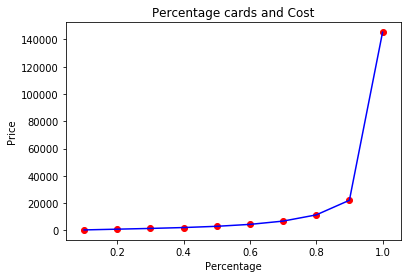

In [269]:
quantile = [0.13, 0.18, 0.22, 0.28, 0.41 , 0.65, 1.12 , 2.28, 6.45]


percentage = np.arange(0, 1, 0.1).tolist()[1:] + [1]

price = []

for i in quantile:
    tmp = sum(list(with_price[with_price['Market Price'] <=i]['Market Price']))
    price.append(tmp)
    
price.append(145306.8)
    
plt.scatter(percentage,price, color='r',zorder=1)
plt.plot(percentage,price,linestyle='solid',color='blue')
plt.title("Percentage cards and Cost")
plt.xlabel("Percentage")
plt.ylabel("Price")
plt.show()

From this plot, we can have a clear picture for the money I need to buy certain percent of yugioh cards, and here you can see a **steep increase** from **90% to 100%**, that means it's not that hard to get 90% percent of cards in yugioh, but hard to collect them all. Just like many stuffs, it's easy to enter the entry level, but hard to be perfect, lol. So if you want to buy all the different yugioh cards, then think about this plot.

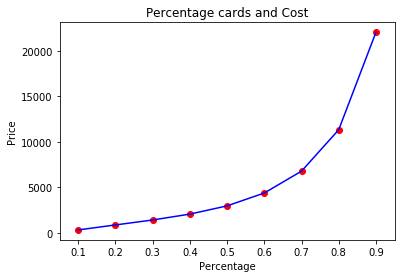

In [270]:
# To clearly see the price below 90%, I draw another picture without price of 100% ownership 

quantile = [0.13, 0.18, 0.22, 0.28, 0.41 , 0.65, 1.12 , 2.28, 6.45]


percentage = np.arange(0, 1, 0.1).tolist()[1:] 

price = []

for i in quantile:
    tmp = sum(list(with_price[with_price['Market Price'] <=i]['Market Price']))
    price.append(tmp)
    
    
plt.scatter(percentage,price, color='r',zorder=1)
plt.plot(percentage,price,linestyle='solid',color='blue')
plt.title("Percentage cards and Cost")
plt.xlabel("Percentage")
plt.ylabel("Price")
plt.show()

**My Habit:** <br>
I am a poor guy who doesn't have much money, so I can't expect myself to collect them all, but I still want to get all the cards. My strategy is to get all the unique cards with the highest rarity they currently have, let me just do a simple analysis about the cost I need to spend.

## Question 2.2: My habit collection cost

In [271]:
with_price

,Name,Set,Rarity,Id,Market Price
0,Red-Eyes B. Dragon,2002 Collectors Tin,Secret,BPT-005,143.41
1,B. Skull Dragon,2002 Collectors Tin,Secret,BPT-006,79.15
2,Summoned Skull,2002 Collectors Tin,Secret,BPT-002,52.81
3,Lord of D.,2002 Collectors Tin,Secret,BPT-004,22.97
4,Blue-Eyes White Dragon,2002 Collectors Tin,Secret,BPT-003,101.2
...,...,...,...,...,...
4,Number 22: Zombiestein,Yu-Gi-Oh! ZEXAL Manga Promotional Cards,Ultra,YZ03-EN001,11.82
5,Number S39: Utopia the Lightning,Yu-Gi-Oh! ZEXAL Manga Promotional Cards,Ultra,YZ08-EN001,3.64
6,Number 72: Shogi Rook,Yu-Gi-Oh! ZEXAL Manga Promotional Cards,Ultra,YZ05-EN001,7.09
7,Number 47: Nightmare Shark,Yu-Gi-Oh! ZEXAL Manga Promotional Cards,Ultra,YZ04-EN001,10.19


In [272]:
with_price['Rarity'].isna().sum() 

# some missing values

10

In [273]:
bool_series = pd.isnull(with_price['Rarity'])

In [274]:
with_price[bool_series]

,Name,Set,Rarity,Id,Market Price
25,Art Token: Syrus Truesdale,Legendary Duelists: Season 1,NaN,Pack,0.33
123,Art Token: Mai Valentine,Legendary Duelists: Season 1,NaN,Pack,1.34
130,Art Token: Maximillion Pegasus,Legendary Duelists: Season 1,NaN,Pack,0.59
132,Art Token: Jesse Anderson,Legendary Duelists: Season 1,NaN,Pack,0.56
133,Art Token: Bandit Keith,Legendary Duelists: Season 1,NaN,Pack,0.52
135,Art Token: Mako Tsunami,Legendary Duelists: Season 1,NaN,Pack,0.34
136,Art Token: Zane Truesdale,Legendary Duelists: Season 1,NaN,Pack,1.19
148,Art Token: Joey Wheeler,Legendary Duelists: Season 1,NaN,Pack,0.73
149,Art Token: Weevil Underwood,Legendary Duelists: Season 1,NaN,Pack,0.35
150,Art Token: Dr. Vellian Crowler,Legendary Duelists: Season 1,NaN,Pack,0.5


In [275]:
price_an = with_price.copy()

In [276]:
# there is one set called Legendary Duelists: Season 1 which is abnormal, it has no rarity, so I decide to  discard it.

price_an = price_an.dropna(axis=0, subset=['Rarity'])

In [277]:
price_an

,Name,Set,Rarity,Id,Market Price
0,Red-Eyes B. Dragon,2002 Collectors Tin,Secret,BPT-005,143.41
1,B. Skull Dragon,2002 Collectors Tin,Secret,BPT-006,79.15
2,Summoned Skull,2002 Collectors Tin,Secret,BPT-002,52.81
3,Lord of D.,2002 Collectors Tin,Secret,BPT-004,22.97
4,Blue-Eyes White Dragon,2002 Collectors Tin,Secret,BPT-003,101.2
...,...,...,...,...,...
4,Number 22: Zombiestein,Yu-Gi-Oh! ZEXAL Manga Promotional Cards,Ultra,YZ03-EN001,11.82
5,Number S39: Utopia the Lightning,Yu-Gi-Oh! ZEXAL Manga Promotional Cards,Ultra,YZ08-EN001,3.64
6,Number 72: Shogi Rook,Yu-Gi-Oh! ZEXAL Manga Promotional Cards,Ultra,YZ05-EN001,7.09
7,Number 47: Nightmare Shark,Yu-Gi-Oh! ZEXAL Manga Promotional Cards,Ultra,YZ04-EN001,10.19


In [278]:
# get all the unique rarity
set(list(price_an['Rarity']))

{'#CIBR-EN040',
 '#CIBR-EN041',
 '#CIBR-EN066',
 '#CIBR-EN080',
 '#COTD-EN036',
 '#COTD-EN037',
 '#COTD-EN066',
 '#COTD-EN080',
 '#DOCS-EN040',
 '#DOCS-EN041',
 '#DOCS-EN066',
 '#DOCS-EN080',
 '#FLOD-EN034',
 '#FLOD-EN035',
 '#FLOD-EN079',
 '#FLOD-EN080',
 '#GLD5-EN001',
 '#GLD5-EN024',
 '#GLD5-EN030',
 '#GLD5-EN033',
 '#GLD5-EN038',
 '#GLD5-EN045',
 '#KACB-EN001',
 '#LART-EN024',
 '#LOD-064',
 '#LOD-080',
 '#MACR-EN037',
 '#MACR-EN064',
 '#MACR-EN080',
 '#MP18-EN060',
 '#MP18-EN061',
 '#MP18-EN129',
 '#MP18-EN146',
 '#OP04-EN014',
 '#OP04-EN015',
 '#OP04-EN022',
 '#OP05-EN014',
 '#OP05-EN015',
 '#OP05-EN022',
 '#SDBE-EN040',
 '#SOFU-EN032',
 '#SOFU-EN066',
 '#SOFU-EN080',
 '#YUCB-EN001',
 '10000',
 "Collector's",
 'Common',
 'Ghost',
 'Gold',
 'Mosaic',
 'Parallel',
 'Platinum',
 'Premium',
 'Prismatic',
 'Rare',
 'Secret',
 'Shatterfoil',
 'Starfoil',
 'Starlight',
 'Super',
 'Ultimate',
 'Ultra'}

In [279]:
# here we found some card ids are scraped in rarity, I check some of them randomly and found in TCG, some cards don't have rarity listed, but total number
# of these cards are few, so I just discard them, besides I also drop 10000 which is wired rarity, let's check who it is 

In [280]:
price_an[price_an['Rarity'] == '10000']
# lol, it is the Thoudsand dragon, which is super expensive, lol, of course I need to discard it

,Name,Set,Rarity,Id,Market Price
95,Ten Thousand Dragon,Battles of Legend: Armageddon,10000,BLAR-EN10K,1370.38


In [281]:
price_an[price_an['Rarity'] == 'Premium']
# lol, it is the Thoudsand dragon, which is super expensive, lol, of course I need to discard it

,Name,Set,Rarity,Id,Market Price
0,Fantastical Dragon Phantazmay (Alternate Art),Maximum Gold,Premium,MAGO-EN018,4.5
1,Gaia the Dragon Champion,Maximum Gold,Premium,MAGO-EN025,0.72
2,"Nibiru, the Primal Being",Maximum Gold,Premium,MAGO-EN019,15
4,Infinite Impermanence,Maximum Gold,Premium,MAGO-EN052,18.76
5,Super Polymerization,Maximum Gold,Premium,MAGO-EN047,3.31
...,...,...,...,...,...
113,Ghost Sister & Spooky Dogwood (Alternate Art),Maximum Gold,Premium,MAGO-EN013,0.82
118,Ghost Reaper & Winter Cherries (Alternate Art),Maximum Gold,Premium,MAGO-EN010,0.59
119,Ghost Reaper & Winter Cherries,Maximum Gold,Premium,MAGO-EN010,0.58
123,Ghost Sister & Spooky Dogwood,Maximum Gold,Premium,MAGO-EN013,0.6


In [282]:
len(set(list(price_an['Rarity'])))

62

In [283]:
# final rarity list 

tmp = list(set(list(price_an['Rarity'])))

final_rarity = []

for i in range(0, len(tmp)):
    if re.search('\#', tmp[i]) == None:
        if tmp[i] != '10000':
            final_rarity.append(tmp[i])
    else:
        continue

final_rarity

['Starlight',
 'Gold',
 'Rare',
 'Prismatic',
 'Premium',
 'Ultimate',
 'Common',
 'Super',
 'Mosaic',
 "Collector's",
 'Ghost',
 'Platinum',
 'Parallel',
 'Starfoil',
 'Secret',
 'Ultra',
 'Shatterfoil']

In [284]:
# then I want to rank the rarity based on my preference

Rarity_preference = {
    'Common' : 1,
    
     'Rare': 2,
    
     'Super' : 3,
    
    'Ultra' : 4,
    
    'Ultimate' : 6,
    
    'Secret' : 7,
    
    'Gold': 7,
    
    'Starlight' : 10,
    
     'Prismatic' : 8,
    
    'Premium' : 7,
    
    'Mosaic' : 3,
    
    "Collector's" : 9,
    
    'Ghost' : 11,
    
     'Platinum' : 6,
    
    'Parallel' : 5,
    
     'Starfoil' : 4,
    
    'Shatterfoil' : 4
}

In [285]:
price_an['Rarity Rank'] = 1

In [286]:
price_an = price_an.reset_index()

In [287]:
price_an = price_an.drop(columns=['index'])

In [288]:
price_an1 = price_an.copy()

In [289]:
price_an1 = price_an1[price_an1['Rarity'].isin(final_rarity)]

In [290]:
price_an1 = price_an1.reset_index()
price_an1 = price_an1.drop(columns=['index'])
price_an1

,Name,Set,Rarity,Id,Market Price,Rarity Rank
0,Red-Eyes B. Dragon,2002 Collectors Tin,Secret,BPT-005,143.41,1
1,B. Skull Dragon,2002 Collectors Tin,Secret,BPT-006,79.15,1
2,Summoned Skull,2002 Collectors Tin,Secret,BPT-002,52.81,1
3,Lord of D.,2002 Collectors Tin,Secret,BPT-004,22.97,1
4,Blue-Eyes White Dragon,2002 Collectors Tin,Secret,BPT-003,101.2,1
...,...,...,...,...,...,...
28015,Number 22: Zombiestein,Yu-Gi-Oh! ZEXAL Manga Promotional Cards,Ultra,YZ03-EN001,11.82,1
28016,Number S39: Utopia the Lightning,Yu-Gi-Oh! ZEXAL Manga Promotional Cards,Ultra,YZ08-EN001,3.64,1
28017,Number 72: Shogi Rook,Yu-Gi-Oh! ZEXAL Manga Promotional Cards,Ultra,YZ05-EN001,7.09,1
28018,Number 47: Nightmare Shark,Yu-Gi-Oh! ZEXAL Manga Promotional Cards,Ultra,YZ04-EN001,10.19,1


In [291]:
# check whether we only keep the rarity we want

set(list(price_an1['Rarity']))

# yes, we get it

{"Collector's",
 'Common',
 'Ghost',
 'Gold',
 'Mosaic',
 'Parallel',
 'Platinum',
 'Premium',
 'Prismatic',
 'Rare',
 'Secret',
 'Shatterfoil',
 'Starfoil',
 'Starlight',
 'Super',
 'Ultimate',
 'Ultra'}

In [292]:
# Then we change the rarity rank score

for i in range(0, price_an1.shape[0]):
    price_an1.iloc[i,5] = Rarity_preference[ price_an1.iloc[i,2] ]

In [303]:
 price_an1

,Name,Set,Rarity,Id,Market Price,Rarity Rank
0,Red-Eyes B. Dragon,2002 Collectors Tin,Secret,BPT-005,143.41,7
1,B. Skull Dragon,2002 Collectors Tin,Secret,BPT-006,79.15,7
2,Summoned Skull,2002 Collectors Tin,Secret,BPT-002,52.81,7
3,Lord of D.,2002 Collectors Tin,Secret,BPT-004,22.97,7
4,Blue-Eyes White Dragon,2002 Collectors Tin,Secret,BPT-003,101.2,7
...,...,...,...,...,...,...
28015,Number 22: Zombiestein,Yu-Gi-Oh! ZEXAL Manga Promotional Cards,Ultra,YZ03-EN001,11.82,4
28016,Number S39: Utopia the Lightning,Yu-Gi-Oh! ZEXAL Manga Promotional Cards,Ultra,YZ08-EN001,3.64,4
28017,Number 72: Shogi Rook,Yu-Gi-Oh! ZEXAL Manga Promotional Cards,Ultra,YZ05-EN001,7.09,4
28018,Number 47: Nightmare Shark,Yu-Gi-Oh! ZEXAL Manga Promotional Cards,Ultra,YZ04-EN001,10.19,4


In [298]:
# based on my preference, we will keep all the highest rarity cards, if there is a single card which has two rarities with the same score, I decide to get the 
# cheapest value of it.

card_name1 = list(set(list(price_an1['Name'])))

In [297]:
# as I said before, some cards have brackets, I firstly remove them.

for i in range(0, price_an1.shape[0]):
    try:
        price_an1.iloc[i,0] = price_an1.iloc[i,0].split('(')[0]     
    except:
        continue

In [300]:
len(set(list(card_name1)))

12228

In [306]:
index_list = []

for i in range(0,len(card_name1)):
    tmp = price_an1[price_an1['Name'] == card_name1[i]]
    tmp1 = tmp[tmp['Rarity Rank'] == max(tmp['Rarity Rank'])]
    tmp2 = tmp1[tmp1['Market Price'] == min(tmp1['Market Price'])]
    number  = tmp2.index[0]
    index_list.append(number)

In [307]:
len(index_list)

12228

In [ ]:
price_an1 = price_an1[price_an1['Rarity'].isin(final_rarity)]

In [315]:
# Well done, we get the preferred card table, lol

my_preference = price_an1.loc[index_list]

In [319]:
# then based on this table, I can tell myself many stuffs. 
# (1) The top 10 most expensive cards

my_preference.sort_values('Market Price',ascending = False).head(10)

# lol, too expensive, but I really like Dark Magician ghost rare !!!!!!!!!!!!!!

,Name,Set,Rarity,Id,Market Price,Rarity Rank
27907,"Chaos Emperor, the Dragon of Armageddon",Yu-Gi-Oh! Championship Series Prize Cards,Super,YCSW-EN011,1450,3
12558,Magic Formula,Gladiator's Assault,Secret,GLAS-EN093,1000,7
27023,Ancient Gear Golem,The Lost Millennium,Ultimate,TLM-EN006,900,6
11182,Elemental Hero Shining Flare Wingman,Elemental Energy,Ultimate,EEN-EN036,899.99,6
20388,"Apollousa, Bow of the Goddess",Rising Rampage,Starlight,RIRA-EN048,847.7,10
12447,Dark Magician,Ghosts From the Past,Ghost,GFTP-EN128,794.94,11
5122,I:P Masquerena,Chaos Impact,Starlight,CHIM-EN049,757.51,10
12540,Elemental Hero Chaos Neos,Gladiator's Assault,Ghost,GLAS-EN036,700.98,11
11187,Elemental Hero Tempest,Elemental Energy,Ultimate,EEN-EN034,699.99,6
20386,"Wynn the Wind Charmer, Verdant",Rising Rampage,Starlight,RIRA-EN046,667.34,10


In [320]:
# so what about the money I should spend? Let's use the same way I did before
my_preference['Market Price'].quantile(np.linspace(.1, 1, 9, 0), 'lower')

0.1    0.13
0.2    0.16
0.3     0.2
0.4    0.26
0.5     0.4
0.6    0.69
0.7    1.35
0.8    2.99
0.9    8.55
Name: Market Price, dtype: object

In [322]:
sum(list(my_preference['Market Price']))

# lol, it is like half of the price compared with buying ever unique cards, good news, but also too expensive 

79276.00999999986

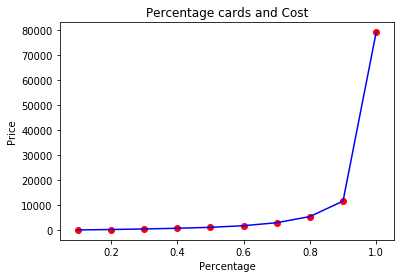

In [323]:
quantile = [0.13, 0.16, 0.2, 0.26, 0.4 , 0.69, 1.35 , 2.99, 8.55]


percentage = np.arange(0, 1, 0.1).tolist()[1:] + [1]

price = []

for i in quantile:
    tmp = sum(list(my_preference[my_preference['Market Price'] <=i]['Market Price']))
    price.append(tmp)
    
price.append(79276)
    
plt.scatter(percentage,price, color='r',zorder=1)
plt.plot(percentage,price,linestyle='solid',color='blue')
plt.title("Percentage cards and Cost")
plt.xlabel("Percentage")
plt.ylabel("Price")
plt.show()

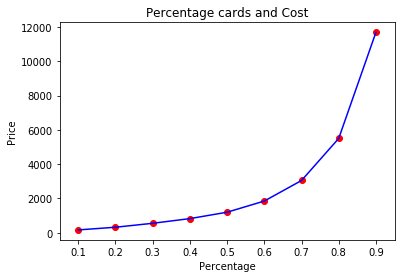

In [324]:
quantile = [0.13, 0.16, 0.2, 0.26, 0.4 , 0.69, 1.35 , 2.99, 8.55]


percentage = np.arange(0, 1, 0.1).tolist()[1:]

price = []

for i in quantile:
    tmp = sum(list(my_preference[my_preference['Market Price'] <=i]['Market Price']))
    price.append(tmp)
    
plt.scatter(percentage,price, color='r',zorder=1)
plt.plot(percentage,price,linestyle='solid',color='blue')
plt.title("Percentage cards and Cost")
plt.xlabel("Percentage")
plt.ylabel("Price")
plt.show()

WoW, compared with the cost of 20000+ dollar  to own 90 percent cards, I just need nearly 12000 to get it based on my preference, and I only need 6000 to get the 80 percent of it. Good news, maybe half of price of a car. VoV